Pseudo-labeling

In [3]:
from textblob import TextBlob
import pandas as pd
df = pd.read_csv("Data\merged_noDuplicate.csv")
df

,title,snippet,published_date,link,authors,source
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09T07:00:00.000Z,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22T07:00:00.000Z,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10T17:13:00.000Z,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21T15:42:41.000Z,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27T07:00:00.000Z,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS
...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03T07:00:00.000Z,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09T07:00:00.000Z,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC
748,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr...,2025-02-11T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/1...,"Lucy Swan, Richard Partington, Ashley Kirk",The Guardian
749,Trump says EU tariffs will ‘definitely happen’...,Trump says EU tariffs will 'definitely happen'...,2025-02-02T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/0...,NaN,The Guardian


In [4]:
print("Missing values\n", df.isnull().sum())
print("Data type of each column\n", df.dtypes)

Missing values
 title               0
snippet             3
published_date      0
link                0
authors           258
source              0
dtype: int64
Data type of each column
 title             object
snippet           object
published_date    object
link              object
authors           object
source            object
dtype: object


In [5]:
from wordcloud import WordCloud
WordCloud().generate(" ".join(df['title']))

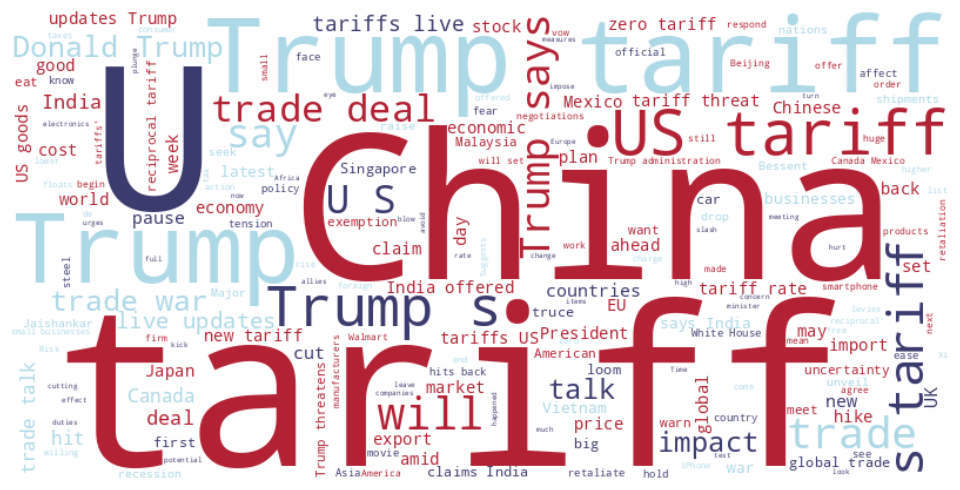

In [6]:

import matplotlib.pyplot as plt

usa_colors = ['#3C3B6E', '#ADD8E6', '#B22234']  # Blue, Light Blue, Red

def usa_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return usa_colors[font_size % len(usa_colors)]

text = " ".join(df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=usa_color_func), interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
df

,title,snippet,published_date,link,authors,source
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09T07:00:00.000Z,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22T07:00:00.000Z,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10T17:13:00.000Z,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21T15:42:41.000Z,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27T07:00:00.000Z,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS
...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03T07:00:00.000Z,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09T07:00:00.000Z,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC
748,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr...,2025-02-11T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/1...,"Lucy Swan, Richard Partington, Ashley Kirk",The Guardian
749,Trump says EU tariffs will ‘definitely happen’...,Trump says EU tariffs will 'definitely happen'...,2025-02-02T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/0...,NaN,The Guardian


Sentiment Distribution


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['text'] = df['title'].fillna('') + '. ' + df['snippet'].fillna('')
# Apply VADER
df['vader_scores'] = df['text'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound score and classify
df['compound'] = df['vader_scores'].apply(lambda x: x['compound'])

def vader_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(vader_sentiment)



In [9]:
df

,title,snippet,published_date,link,authors,source,text,vader_scores,compound,sentiment
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09T07:00:00.000Z,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News,Trump limits tariffs on most nations for 90 da...,"{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'comp...",0.0129,neutral
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22T07:00:00.000Z,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN,Trump says China tariffs will ‘come down subst...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.5994,negative
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10T17:13:00.000Z,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR,U.S. and China begin talks amid tensions over ...,"{'neg': 0.242, 'neu': 0.716, 'pos': 0.042, 'co...",-0.8658,negative
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21T15:42:41.000Z,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News,Trump tariffs live updates: US won't drop Chin...,"{'neg': 0.092, 'neu': 0.751, 'pos': 0.157, 'co...",0.3089,positive
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27T07:00:00.000Z,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS,Trump favors huge new tariffs. How do they wor...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.7269,positive
...,...,...,...,...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03T07:00:00.000Z,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC,Canada will respond to Trump tariffs 'with pur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09T07:00:00.000Z,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC,Trump threatens to end pharmaceuticals tariff ...,"{'neg': 0.176, 'neu': 0.749, 'pos': 0.075, 'co...",-0.4767,negative
748,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr...,2025-02-11T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/1...,"Lucy Swan, Richard Partington, Ashley Kirk",The Guardian,Why is Trump imposing tariffs and which countr...,"{'neg': 0.029, 'neu': 0.971, 'pos': 0.0, 'comp...",-0.0516,negative
749,Trump says EU tariffs will ‘definitely happen’...,Trump says EU tariffs will 'definitely happen'...,2025-02-02T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/0...,NaN,The Guardian,Trump says EU tariffs will ‘definitely happen’...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",0.4019,positive


In [10]:
print("Count of sentiments:",df['sentiment'].value_counts())
# df['compound'].describe()

Count of sentiments: sentiment
negative    374
positive    244
neutral     133
Name: count, dtype: int64


In [11]:
from plotly import graph_objs as go

# Prepare sentiment counts
sentiment_counts = df['sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

usa_colors = ['#3C3B6E', '#FFFFEE', '#B22234']  # Blue, White, Red

fig = go.Figure(
    go.Bar(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        marker_color=usa_colors
    )
)
fig.update_layout(
    title="Bar Chart of Sentiment Distribution",
    xaxis_title="Sentiment",
    yaxis_title="Count",
   
)
fig.show()

In [12]:

# Prepare sentiment counts
sentiment_counts = df['sentiment'].value_counts().reindex([ 'neutral','positive', 'negative'], fill_value=0)

usa_colors = ['#3C3B6E', '#FFFFEE', '#B22234']  # Blue, White, Red

fig = go.Figure(
    go.Funnel(
        y=sentiment_counts.index,
        x=sentiment_counts.values,
        marker_color=usa_colors
    )
)
fig.update_layout(
    title="Funnel Chart of Sentiment Distribution",
    xaxis_title="Count",
    yaxis_title="Sentiment"
)
fig.show()

In [13]:
average_polarity = df['compound'].mean()
print(f"Average polarity score per article: {average_polarity:.4f}")

Average polarity score per article: -0.0892


In [14]:

sentiment_counts = df['sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Calculate mean polarity
mean_polarity = df['compound'].mean()

fig = go.Figure(
    go.Bar(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        marker_color=usa_colors
    )
)

# Add mean polarity as annotation
fig.add_annotation(
    x=1,  # Place at 'neutral' bar (index 1)
    y=max(sentiment_counts.values),
    text=f"Mean Polarity: {mean_polarity:.2f}",
    showarrow=False,
    font=dict(color="black", size=14, family="Arial"),
    bgcolor="rgba(255,255,255,0.7)"
)

fig.update_layout(
    title="Bar Chart of Sentiment Distribution (with Mean Polarity)",
    xaxis_title="Sentiment",
    yaxis_title="Count",
    template="plotly_white"
)
fig.show()

C:\Users\Yourisha\AppData\Local\Temp\ipykernel_10424\3997603168.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\Yourisha\AppData\Local\Temp\ipykernel_10424\3997603168.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\Yourisha\AppData\Local\Temp\ipykernel_10424\3997603168.py:11: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



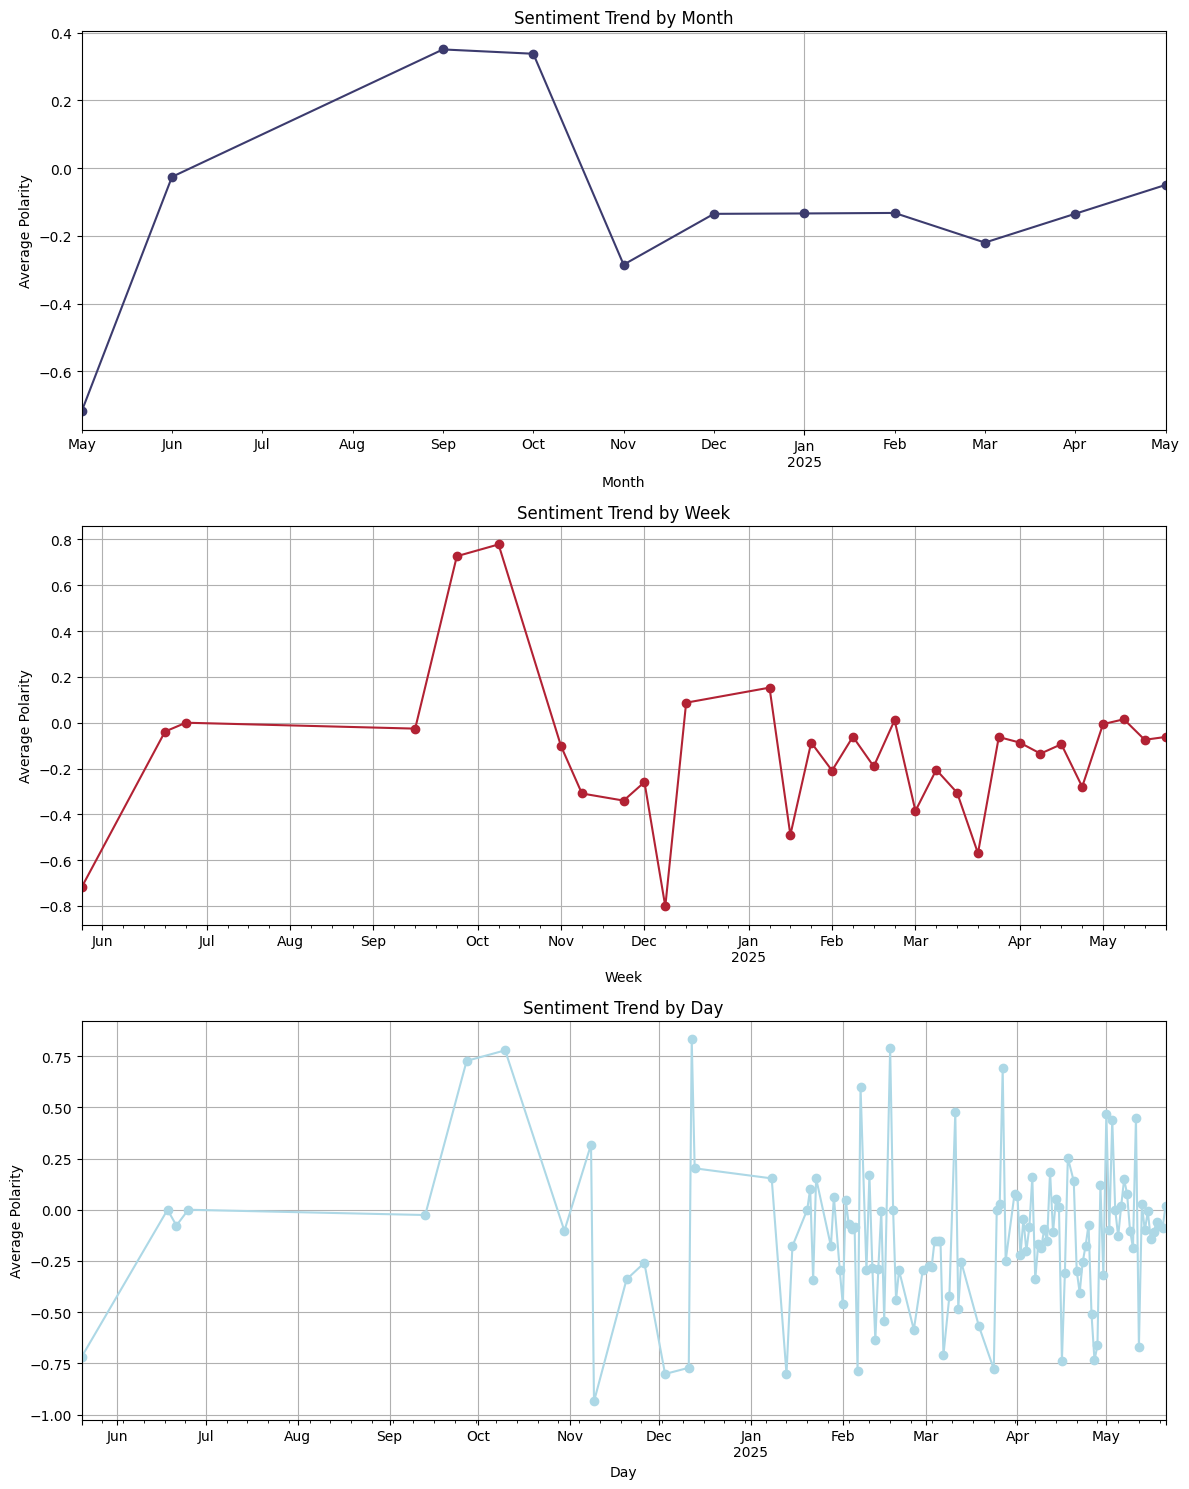

In [15]:


# Ensure published_date is datetime
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Group by month and calculate mean polarity
monthly_trend = df.groupby(df['published_date'].dt.to_period('M'))['compound'].mean()

# Group by week and calculate mean polarity
weekly_trend = df.groupby(df['published_date'].dt.to_period('W'))['compound'].mean()

# Group by day and calculate mean polarity
daily_trend = df.groupby(df['published_date'].dt.to_period('D'))['compound'].mean()

# Plot all trends
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=False)

monthly_trend.plot(ax=axs[0], marker='o', color='#3C3B6E')
axs[0].set_title('Sentiment Trend by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Polarity')
axs[0].grid(True)

weekly_trend.plot(ax=axs[1], marker='o', color='#B22234')
axs[1].set_title('Sentiment Trend by Week')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Average Polarity')
axs[1].grid(True)

daily_trend.plot(ax=axs[2], marker='o', color='#ADD8E6')
axs[2].set_title('Sentiment Trend by Day')
axs[2].set_xlabel('Day')
axs[2].set_ylabel('Average Polarity')
axs[2].grid(True)

plt.tight_layout()
plt.show()

Discussion


Sentiment is reactive: Peaks and dips likely correlate with major news events.

December spike deserves deeper inspection — which articles caused this?

Consider smoothing your daily/weekly charts (e.g., 7-day rolling average) for better readability.

Combine this analysis with keyword trends or event timelines for richer insights.

Keyword analysis

In [17]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['Month'] = df['published_date'].dt.to_period('M')
keywords = ['trump', 'tariff', 'china', 'steel','semiconductor','electronic','semiconductors','electronics']



C:\Users\Yourisha\AppData\Local\Temp\ipykernel_10424\2606686773.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [18]:

# Function to check if a keyword appears in text
def contains_keyword(text, keyword):
    return keyword.lower() in str(text).lower()

# Create a new column for each keyword
for keyword in keywords:
    df[keyword] = df['text'].apply(lambda x: contains_keyword(x, keyword))

# Group by month and sum the keyword mentions
monthly_keyword_trends = df.groupby('Month')[keywords].sum()
monthly_keyword_trends.index = monthly_keyword_trends.index.to_timestamp()


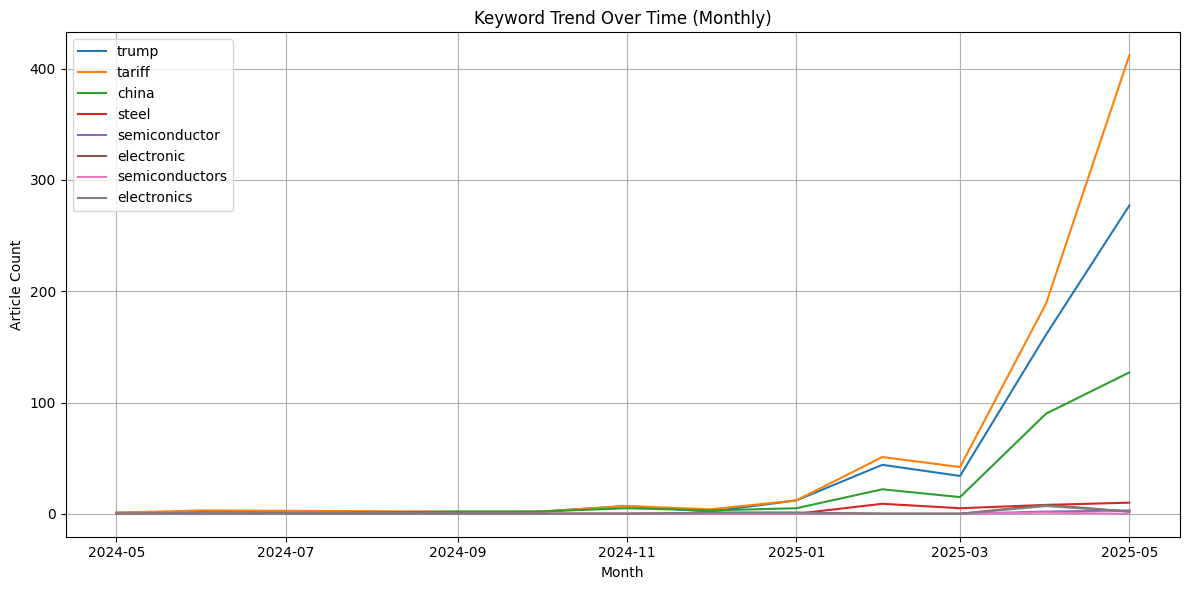

In [19]:

plt.figure(figsize=(12, 6))
for keyword in keywords:
    plt.plot(monthly_keyword_trends.index, monthly_keyword_trends[keyword], label=keyword)

plt.title("Keyword Trend Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Article Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Keywords + Trend Over Time

In [118]:
! pip install pandas matplotlib nltk


In [20]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine title + snippet + text into one column
df['full_text'] = df[['title', 'snippet', 'text']].fillna('').agg(' '.join, axis=1)

# Lowercase, remove punctuation
df['clean_text'] = df['full_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# Tokenize each row and filter stopwords and short words
df['tokens'] = df['clean_text'].apply(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2])

# Flatten all tokens into one list
all_tokens = [word for tokens in df['tokens'] for word in tokens]

# Get top 10 most common words
top_10_words = [word for word, count in Counter(all_tokens).most_common(10)]
print("Top 10 Words:", top_10_words)


Top 10 Words: ['tariffs', 'trump', 'tariff', 'trade', 'china', 'president', 'donald', 'goods', 'trumps', 'imports']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df

,title,snippet,published_date,link,authors,source,text,vader_scores,compound,sentiment,...,tariff,china,steel,semiconductor,electronic,semiconductors,electronics,full_text,clean_text,tokens
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09 07:00:00+00:00,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News,Trump limits tariffs on most nations for 90 da...,"{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'comp...",0.0129,neutral,...,True,False,False,False,False,False,False,Trump limits tariffs on most nations for 90 da...,trump limits tariffs on most nations for 90 da...,"[trump, limits, tariffs, nations, days, raises..."
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22 07:00:00+00:00,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN,Trump says China tariffs will ‘come down subst...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.5994,negative,...,True,True,False,False,False,False,False,Trump says China tariffs will ‘come down subst...,trump says china tariffs will ‘come down subst...,"[trump, says, china, tariffs, ‘come, substanti..."
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10 17:13:00+00:00,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR,U.S. and China begin talks amid tensions over ...,"{'neg': 0.242, 'neu': 0.716, 'pos': 0.042, 'co...",-0.8658,negative,...,True,True,False,False,False,False,False,U.S. and China begin talks amid tensions over ...,us and china begin talks amid tensions over tr...,"[china, begin, talks, amid, tensions, trumps, ..."
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21 15:42:41+00:00,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News,Trump tariffs live updates: US won't drop Chin...,"{'neg': 0.092, 'neu': 0.751, 'pos': 0.157, 'co...",0.3089,positive,...,True,True,False,False,False,False,False,Trump tariffs live updates: US won't drop Chin...,trump tariffs live updates us wont drop china ...,"[trump, tariffs, live, updates, wont, drop, ch..."
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27 07:00:00+00:00,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS,Trump favors huge new tariffs. How do they wor...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.7269,positive,...,True,True,False,False,False,False,False,Trump favors huge new tariffs. How do they wor...,trump favors huge new tariffs how do they work...,"[trump, favors, huge, new, tariffs, work, form..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03 07:00:00+00:00,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC,Canada will respond to Trump tariffs 'with pur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,...,True,False,False,False,False,False,False,Canada will respond to Trump tariffs 'with pur...,canada will respond to trump tariffs with purp...,"[canada, respond, trump, tariffs, purpose, for..."
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09 07:00:00+00:00,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC,Trump threatens to end pharmaceuticals tariff ...,"{'neg': 0.176, 'neu': 0.749, 'pos': 0.075, 'co...",-0.4767,negative,...,True,False,False,False,False,False,False,Trump threatens to end pharmaceuticals tariff ...,trump threatens to end pharmaceuticals tariff ...,"[trump, threatens, end, pharmaceuticals, tarif..."
748,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr.

In [22]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Lemmatize tokens in each row
df['lemmas'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Flatten all lemmas into one list
all_lemmas = [lemma for lemmas in df['lemmas'] for lemma in lemmas]

# Get top 10 most common lemmatized words
top_10_lemmas = [word for word, count in Counter(all_lemmas).most_common(10)]
print("Top 10 Lemmas:", top_10_lemmas)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Top 10 Lemmas: ['tariff', 'trump', 'trade', 'china', 'president', 'donald', 'good', 'import', 'say', 'deal']


In [23]:
df

,title,snippet,published_date,link,authors,source,text,vader_scores,compound,sentiment,...,china,steel,semiconductor,electronic,semiconductors,electronics,full_text,clean_text,tokens,lemmas
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09 07:00:00+00:00,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News,Trump limits tariffs on most nations for 90 da...,"{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'comp...",0.0129,neutral,...,False,False,False,False,False,False,Trump limits tariffs on most nations for 90 da...,trump limits tariffs on most nations for 90 da...,"[trump, limits, tariffs, nations, days, raises...","[trump, limit, tariff, nation, day, raise, tax..."
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22 07:00:00+00:00,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN,Trump says China tariffs will ‘come down subst...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.5994,negative,...,True,False,False,False,False,False,Trump says China tariffs will ‘come down subst...,trump says china tariffs will ‘come down subst...,"[trump, says, china, tariffs, ‘come, substanti...","[trump, say, china, tariff, ‘come, substantial..."
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10 17:13:00+00:00,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR,U.S. and China begin talks amid tensions over ...,"{'neg': 0.242, 'neu': 0.716, 'pos': 0.042, 'co...",-0.8658,negative,...,True,False,False,False,False,False,U.S. and China begin talks amid tensions over ...,us and china begin talks amid tensions over tr...,"[china, begin, talks, amid, tensions, trumps, ...","[china, begin, talk, amid, tension, trump, tar..."
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21 15:42:41+00:00,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News,Trump tariffs live updates: US won't drop Chin...,"{'neg': 0.092, 'neu': 0.751, 'pos': 0.157, 'co...",0.3089,positive,...,True,False,False,False,False,False,Trump tariffs live updates: US won't drop Chin...,trump tariffs live updates us wont drop china ...,"[trump, tariffs, live, updates, wont, drop, ch...","[trump, tariff, live, update, wont, drop, chin..."
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27 07:00:00+00:00,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS,Trump favors huge new tariffs. How do they wor...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.7269,positive,...,True,False,False,False,False,False,Trump favors huge new tariffs. How do they wor...,trump favors huge new tariffs how do they work...,"[trump, favors, huge, new, tariffs, work, form...","[trump, favor, huge, new, tariff, work, former..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03 07:00:00+00:00,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC,Canada will respond to Trump tariffs 'with pur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,...,False,False,False,False,False,False,Canada will respond to Trump tariffs 'with pur...,canada will respond to trump tariffs with purp...,"[canada, respond, trump, tariffs, purpose, for...","[canada, respond, trump, tariff, purpose, forc..."
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09 07:00:00+00:00,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC,Trump threatens to end pharmaceuticals tariff ...,"{'neg': 0.176, 'neu': 0.749, 'pos': 0.075, 'co...",-0.4767,negative,...,False,False,

In [26]:
print(top_10_lemmas)
print(top_10_words)

['tariff', 'trump', 'trade', 'china', 'president', 'donald', 'good', 'import', 'say', 'deal']
['tariffs', 'trump', 'tariff', 'trade', 'china', 'president', 'donald', 'goods', 'trumps', 'imports']


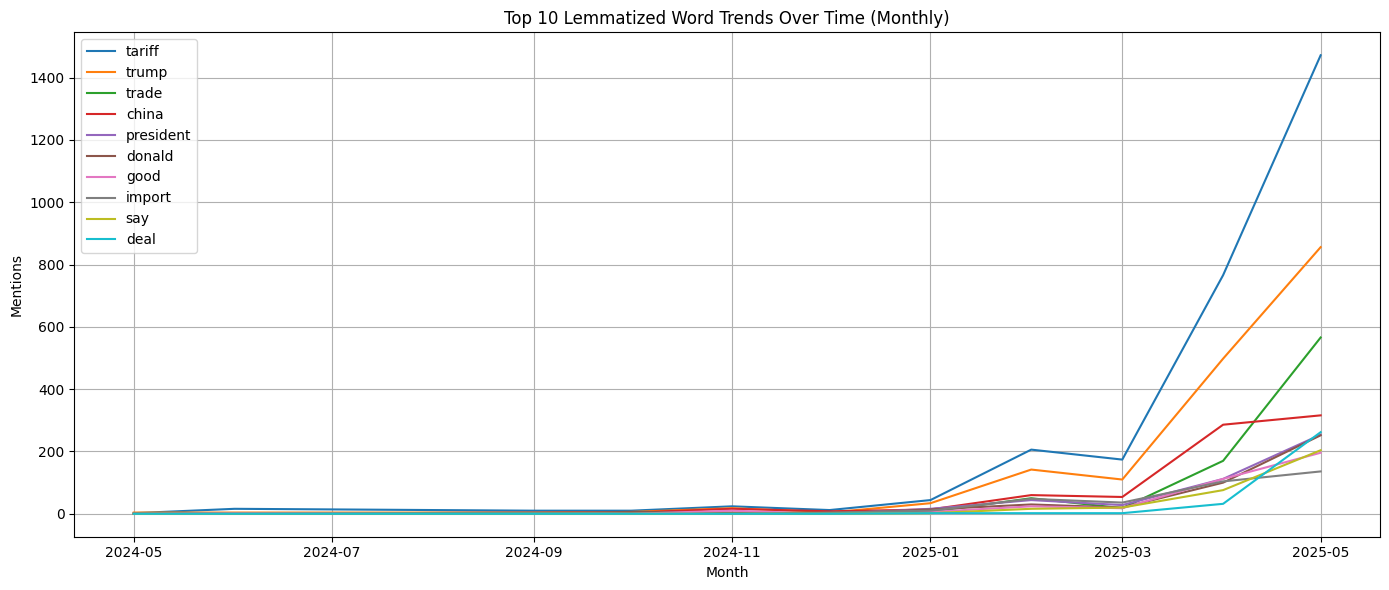

In [28]:
# Compute monthly trends for top 10 lemmatized words
# Create a DataFrame with months as index and top 10 lemmas as columns
word_trends = (
    df.explode('lemmas')
      .groupby(['Month', 'lemmas'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=top_10_lemmas, fill_value=0)
)

# Convert PeriodIndex to timestamp for plotting
word_trends.index = word_trends.index.to_timestamp()

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
for lemma in top_10_lemmas:
    if lemma in word_trends.columns:
        plt.plot(word_trends.index, word_trends[lemma], label=lemma)

plt.title("Top 10 Lemmatized Word Trends Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Mentions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


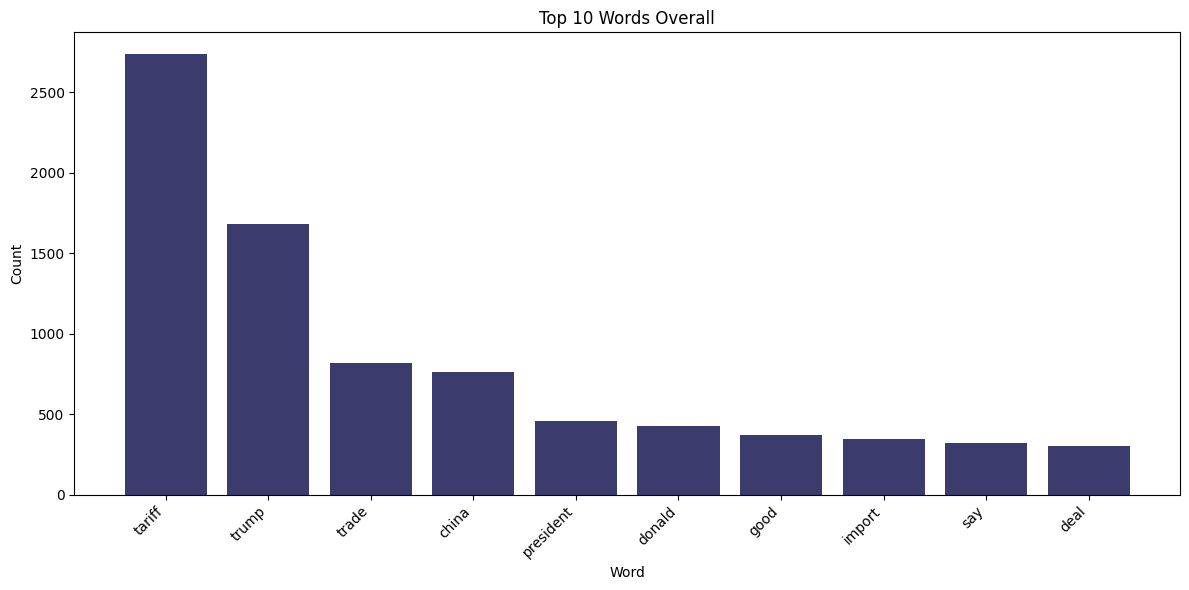

In [29]:
# Get counts for top 10 lemmatized words
lemma_counts = Counter(all_lemmas)
words = top_10_lemmas
counts = [lemma_counts[word] for word in words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='#3C3B6E')
plt.title("Top 10 Words Overall")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


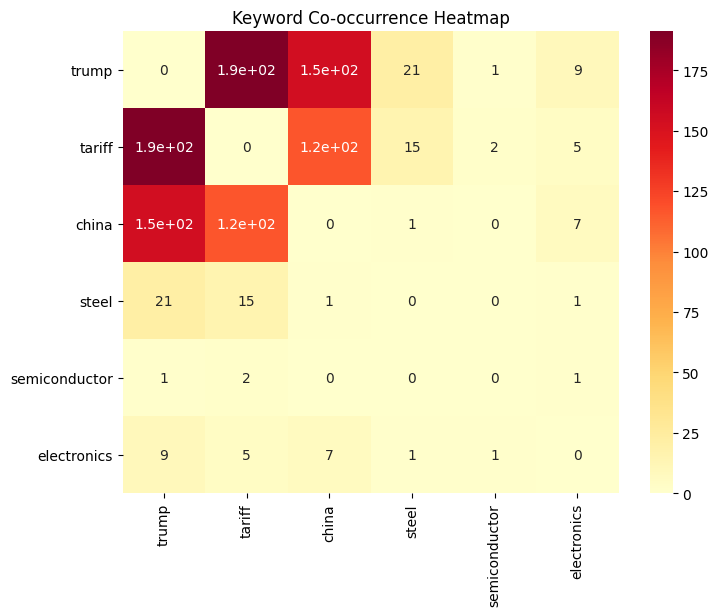

In [30]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine text fields
df['full_text'] = df[['title', 'snippet', 'text']].fillna('').agg(' '.join, axis=1)
df['clean_text'] = df['full_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# Tokenize each article (row) and filter
df['tokens'] = df['clean_text'].apply(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2])

# Optional: Choose specific keywords to track
keywords = ['trump', 'tariff', 'china', 'steel', 'semiconductor', 'electronics']

# Create co-occurrence matrix
co_occurrence = pd.DataFrame(0, index=keywords, columns=keywords)

# Count co-occurrence per article
for tokens in df['tokens']:
    tokens_set = set(tokens)
    for w1 in keywords:
        for w2 in keywords:
            if w1 != w2 and w1 in tokens_set and w2 in tokens_set:
                co_occurrence.loc[w1, w2] += 1

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, cmap="YlOrRd")
plt.title("Keyword Co-occurrence Heatmap")
plt.show()


Topic Source Analysis

source
BBC                   104
Reuters                74
The Guardian           39
CNN                    28
The New York Times     27
Yahoo Finance          25
astroawani.com         20
Al Jazeera             18
NPR                    15
Times of India         15
Financial Times        15
NBC News               15
PBS                    14
Yahoo                  11
CNA                    10
The Straits Times      10
CNBC                   10
The Business Times      9
Mint                    9
The Economic Times      8
Name: count, dtype: int64


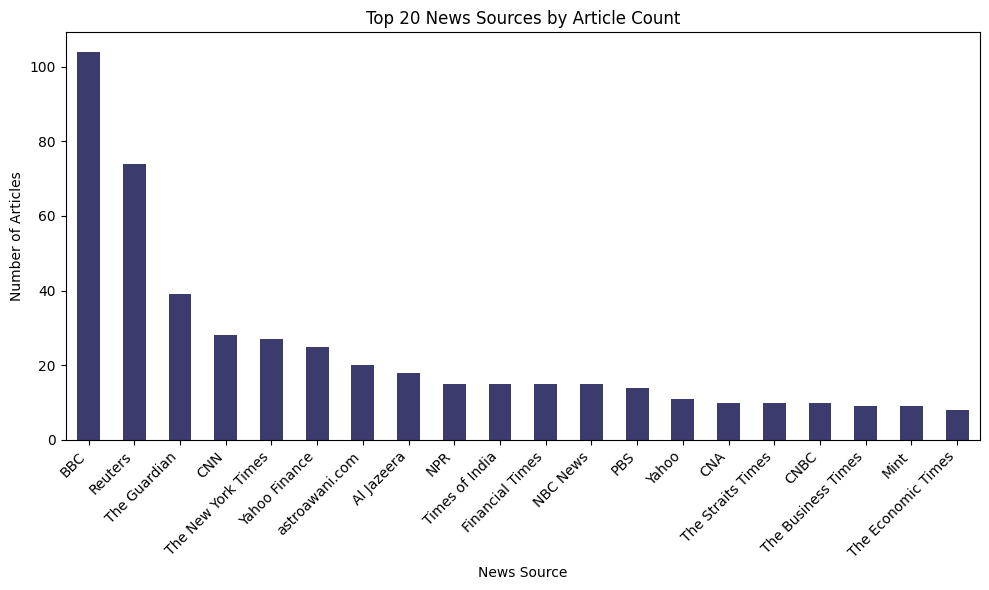

In [31]:
# Count articles by news source
source_counts = df['source'].value_counts().head(20)
print(source_counts)

# Optional: Plot the top 20 sources
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
source_counts.plot(kind='bar', color='#3C3B6E')
plt.title('Top 20 News Sources by Article Count')
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
#What is each source's average sentiment?
source_sentiment = df.groupby('source')['compound'].mean().sort_values(ascending=False)
print(source_sentiment)

source
Foreign Policy                                0.8481
Zee News                                      0.8074
Swarajyamag                                   0.7906
Singapore Economic Development Board (EDB)    0.6597
Forexlive                                     0.6369
                                               ...  
LSE Blogs                                    -0.8020
Investor's Business Daily                    -0.8074
Newsweek                                     -0.8225
news.cgtn.com                                -0.8360
CalMatters                                   -0.8360
Name: compound, Length: 172, dtype: float64


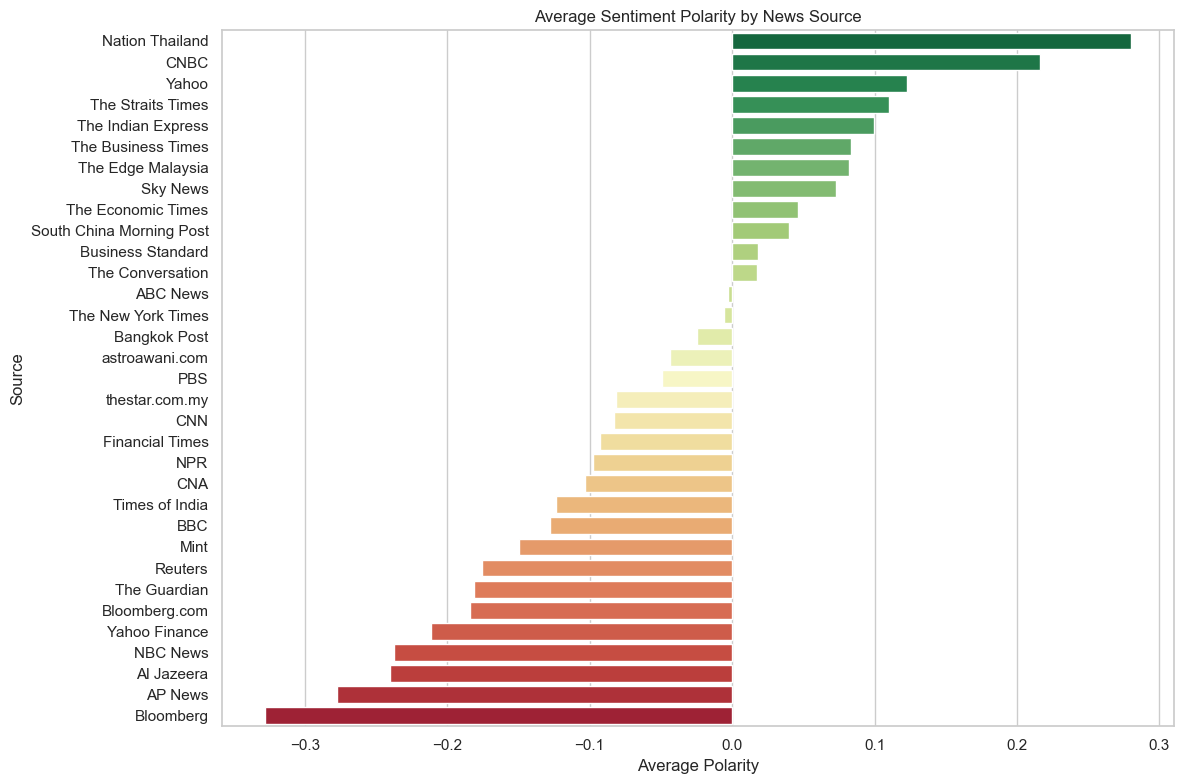

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Remove empty/null source values
df_filtered = df[df['source'].notna() & (df['source'] != '')]

# Group by source and calculate average polarity
source_sentiment = (
    df_filtered.groupby('source')['compound']
    .agg(['count', 'mean'])
    .sort_values(by='mean', ascending=False)
)

# Optional: filter out sources with very few articles (e.g., < 5)
source_sentiment = source_sentiment[source_sentiment['count'] >= 5]

# Plot: Average polarity per source
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=source_sentiment.index, data=source_sentiment, palette='RdYlGn_r')
plt.title("Average Sentiment Polarity by News Source")
plt.xlabel("Average Polarity")
plt.ylabel("Source")
plt.tight_layout()
plt.show()


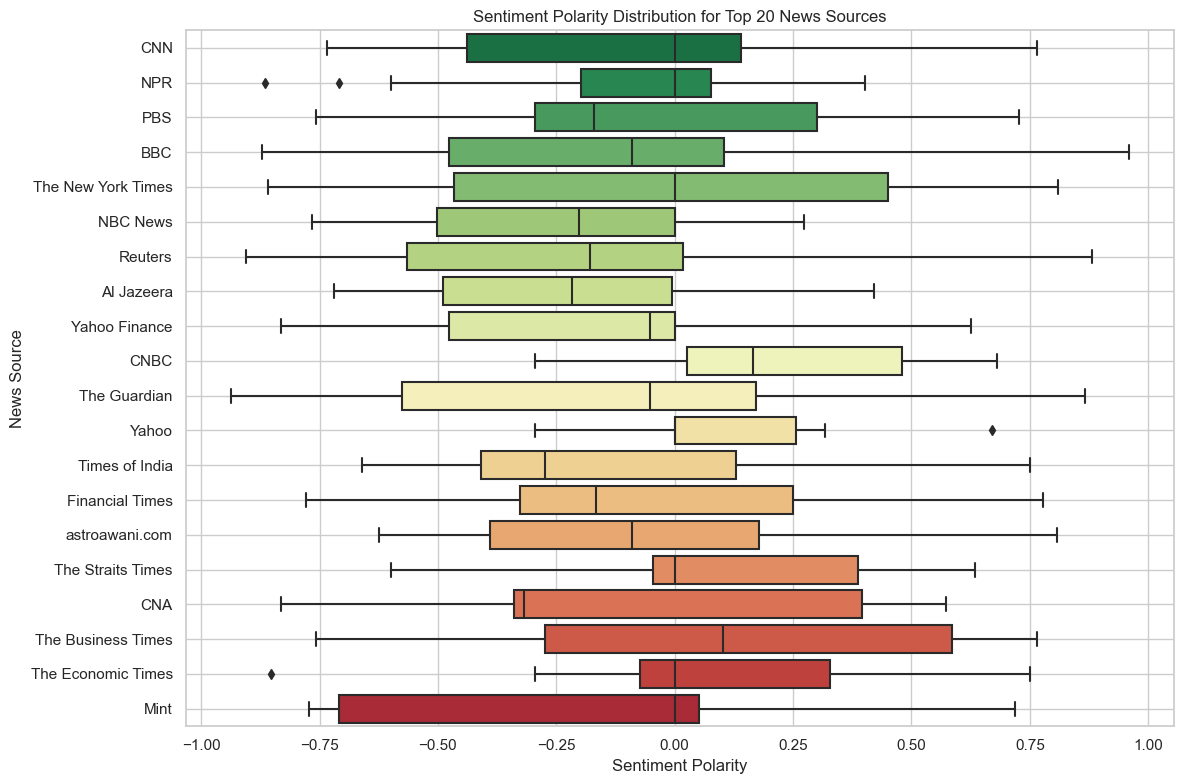

In [34]:

# Calculate article counts per source and determine the top 20 sources
top_sources = df['source'].value_counts().head(20).index

# Filter the DataFrame to only include these sources
filtered_df = df[df['source'].isin(top_sources)]

# Plot sentiment polarity distribution via a boxplot for these sources
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=filtered_df,
    x='compound',
    y='source',
    palette="RdYlGn_r",  # Reversed diverging colormap for red (negative) to green (positive)
    orient='h'
)
plt.title('Sentiment Polarity Distribution for Top 20 News Sources')
plt.xlabel('Sentiment Polarity')
plt.ylabel('News Source')
plt.grid(True)
plt.tight_layout()
plt.show()


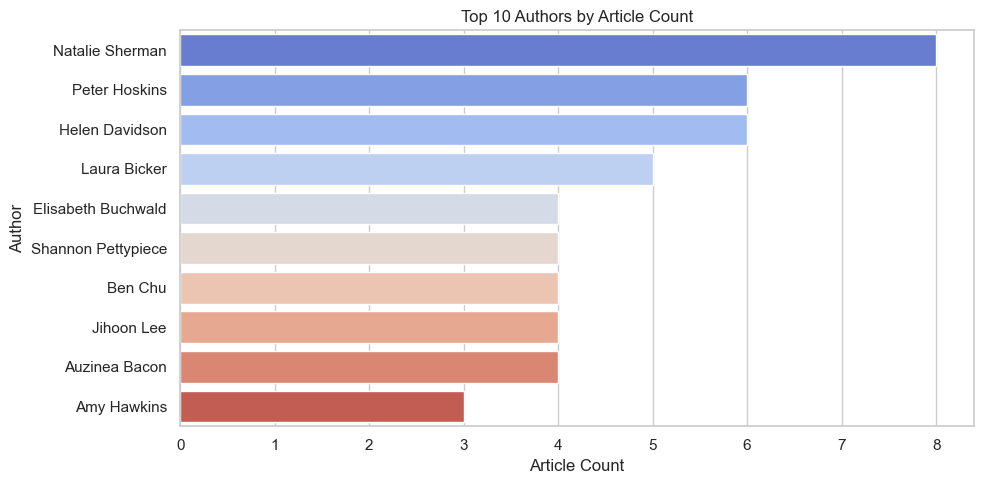

In [35]:
# Top 10 authors by number of articles
author_counts = df['authors'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title("Top 10 Authors by Article Count")
plt.xlabel("Article Count")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

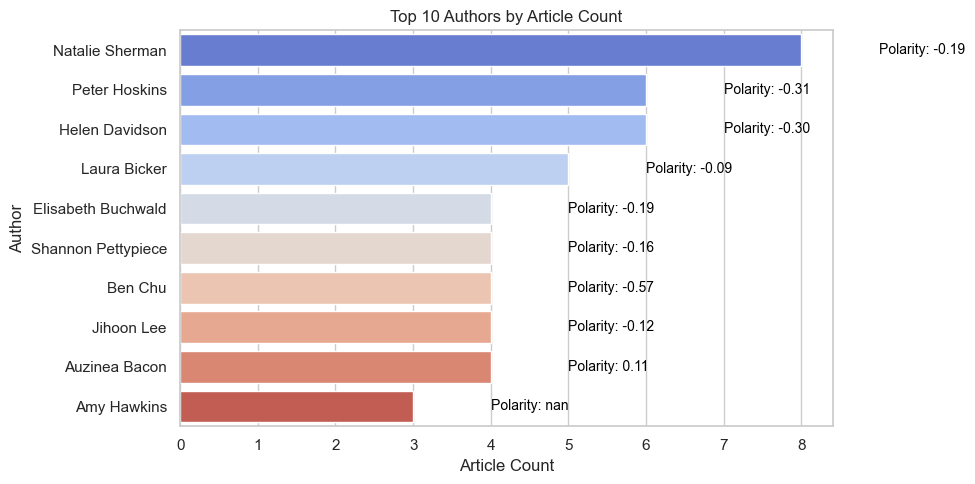

In [38]:
# Bar chart of top 10 authors by article count, with average polarity as annotation

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title("Top 10 Authors by Article Count")
plt.xlabel("Article Count")
plt.ylabel("Author")

# Add average polarity as annotation next to each bar
for i, author in enumerate(author_counts.index):
    avg_polarity = author_sentiment.loc[author, 'mean'] if author in author_sentiment.index else float('nan')
    ax.text(
        author_counts.values[i] + 1,  # Slightly to the right of the bar
        i,
        f"Polarity: {avg_polarity:.2f}",
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

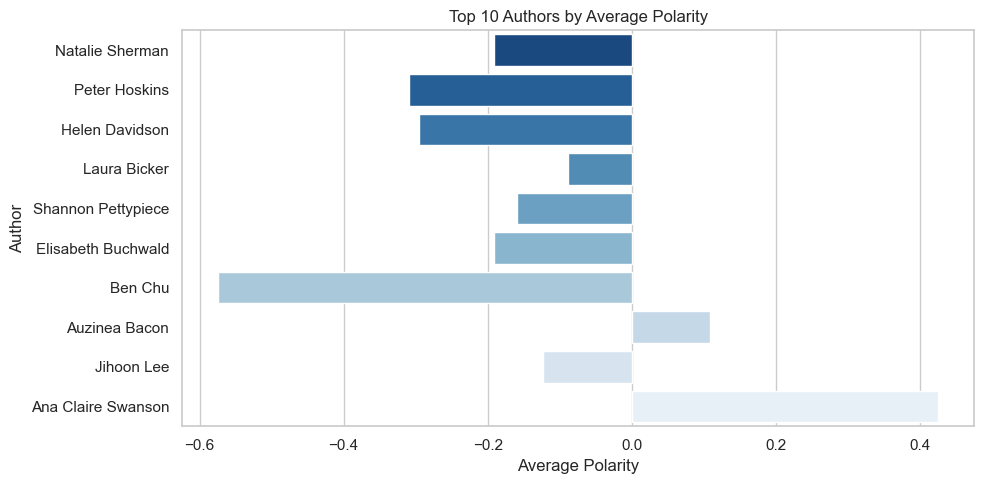

In [37]:
# 4. Average Polarity per Author (Top 10 by volume)
author_sentiment = (
    df[df['authors'].notna() & (df['authors'] != '')]
    .groupby('authors')['compound']
    .agg(['count', 'mean'])
    .sort_values(by='count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=author_sentiment['mean'], y=author_sentiment.index, palette='Blues_r')
plt.title("Top 10 Authors by Average Polarity")
plt.xlabel("Average Polarity")
plt.ylabel("Author")
plt.tight_layout()
plt.show()



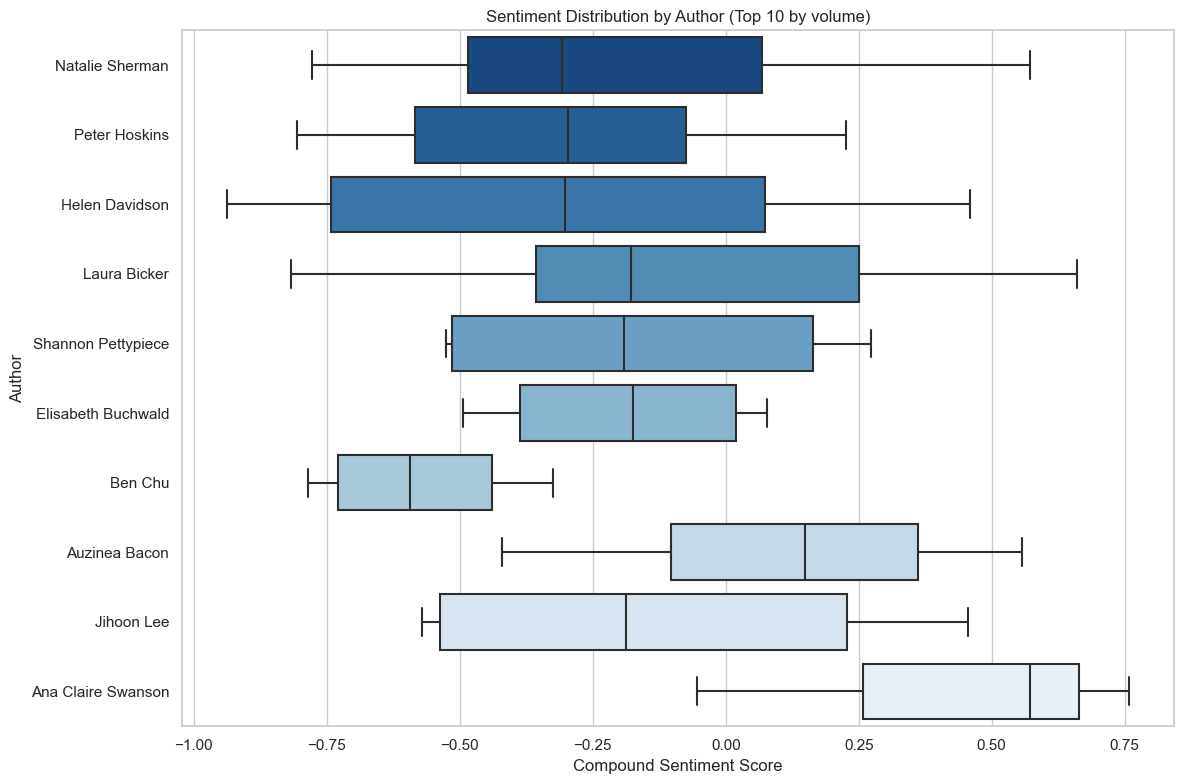

In [39]:

# 5. Sentiment Distribution by Author (Top 10 by volume)
plt.figure(figsize=(12, 8))
top10_authors = author_sentiment.index
filtered = df[df['authors'].isin(top10_authors)]
sns.boxplot(
    data=filtered,
    x='compound',  # Use the numeric sentiment score
    y='authors',
    order=top10_authors,
    palette='Blues_r'
)
plt.title("Sentiment Distribution by Author (Top 10 by volume)")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

In [40]:
# Print top 20 authors by number of articles written
top_20_authors = df['authors'].value_counts().head(20)
print(top_20_authors)

authors
Natalie Sherman       8
Peter Hoskins         6
Helen Davidson        6
Laura Bicker          5
Elisabeth Buchwald    4
Shannon Pettypiece    4
Ben Chu               4
Jihoon Lee            4
Auzinea Bacon         4
Amy Hawkins           3
Ana Claire Swanson    3
David Goldman         3
Leika Kihara          3
Emily Feng            3
Madeline Halpert      3
Matt Spivey           3
Paul Wiseman          3
Alex Kozul-wright     3
Max Zahn              2
Ben Berkowitz         2
Name: count, dtype: int64


In [41]:
df

,title,snippet,published_date,link,authors,source,text,vader_scores,compound,sentiment,...,china,steel,semiconductor,electronic,semiconductors,electronics,full_text,clean_text,tokens,lemmas
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09 07:00:00+00:00,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News,Trump limits tariffs on most nations for 90 da...,"{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'comp...",0.0129,neutral,...,False,False,False,False,False,False,Trump limits tariffs on most nations for 90 da...,trump limits tariffs on most nations for 90 da...,"[trump, limits, tariffs, nations, days, raises...","[trump, limit, tariff, nation, day, raise, tax..."
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22 07:00:00+00:00,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN,Trump says China tariffs will ‘come down subst...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.5994,negative,...,True,False,False,False,False,False,Trump says China tariffs will ‘come down subst...,trump says china tariffs will ‘come down subst...,"[trump, says, china, tariffs, ‘come, substanti...","[trump, say, china, tariff, ‘come, substantial..."
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10 17:13:00+00:00,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR,U.S. and China begin talks amid tensions over ...,"{'neg': 0.242, 'neu': 0.716, 'pos': 0.042, 'co...",-0.8658,negative,...,True,False,False,False,False,False,U.S. and China begin talks amid tensions over ...,us and china begin talks amid tensions over tr...,"[china, begin, talks, amid, tensions, trumps, ...","[china, begin, talk, amid, tension, trump, tar..."
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21 15:42:41+00:00,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News,Trump tariffs live updates: US won't drop Chin...,"{'neg': 0.092, 'neu': 0.751, 'pos': 0.157, 'co...",0.3089,positive,...,True,False,False,False,False,False,Trump tariffs live updates: US won't drop Chin...,trump tariffs live updates us wont drop china ...,"[trump, tariffs, live, updates, wont, drop, ch...","[trump, tariff, live, update, wont, drop, chin..."
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27 07:00:00+00:00,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS,Trump favors huge new tariffs. How do they wor...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.7269,positive,...,True,False,False,False,False,False,Trump favors huge new tariffs. How do they wor...,trump favors huge new tariffs how do they work...,"[trump, favors, huge, new, tariffs, work, form...","[trump, favor, huge, new, tariff, work, former..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03 07:00:00+00:00,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC,Canada will respond to Trump tariffs 'with pur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,...,False,False,False,False,False,False,Canada will respond to Trump tariffs 'with pur...,canada will respond to trump tariffs with purp...,"[canada, respond, trump, tariffs, purpose, for...","[canada, respond, trump, tariff, purpose, forc..."
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09 07:00:00+00:00,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC,Trump threatens to end pharmaceuticals tariff ...,"{'neg': 0.176, 'neu': 0.749, 'pos': 0.075, 'co...",-0.4767,negative,...,False,False,

## Predictive Modeling



In [43]:
! pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.5/13.3 MB 1.1 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/13.3 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/13.3 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/13.3 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/13.3 MB 1.1 MB/s eta 0:00:11
   ----- ---------------------------------- 1.8/13.3 MB 1.1 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/13.3 MB 1.0 MB/s eta 0:00:11
   ------- -------------------------------- 2.4/13.3 MB 1.1 MB/s eta 0:00:11
   ------- -------------------------------- 2.6/13.3 MB 1.1 MB/s eta 0:00:10
   -------- --------

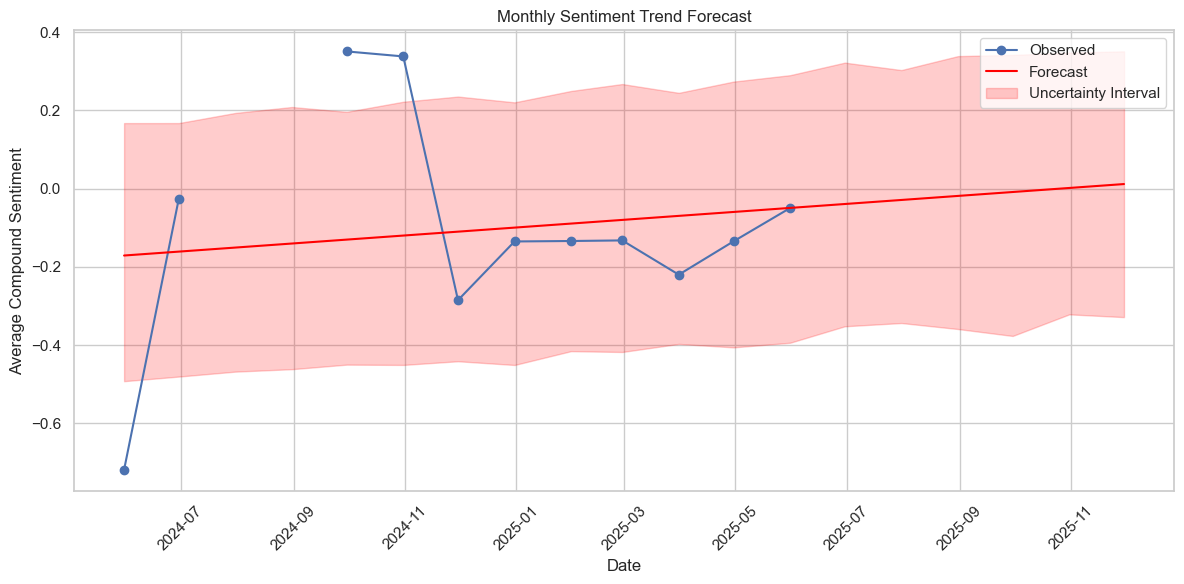

In [47]:
import matplotlib.pyplot as plt

# Plot the forecast with readable axes
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ts_df['ds'], ts_df['y'], label='Observed', marker='o')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Uncertainty Interval')

ax.set_title('Monthly Sentiment Trend Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Average Compound Sentiment')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

           ds         y
0  2024-05-31 -0.718400
1  2024-06-30 -0.025733
2  2024-07-31       NaN
3  2024-08-31       NaN
4  2024-09-30  0.350550
5  2024-10-31  0.337800
6  2024-11-30 -0.284986
7  2024-12-31 -0.134950
8  2025-01-31 -0.133792
9  2025-02-28 -0.132276
10 2025-03-31 -0.219814
11 2025-04-30 -0.134674
12 2025-05-31 -0.049593


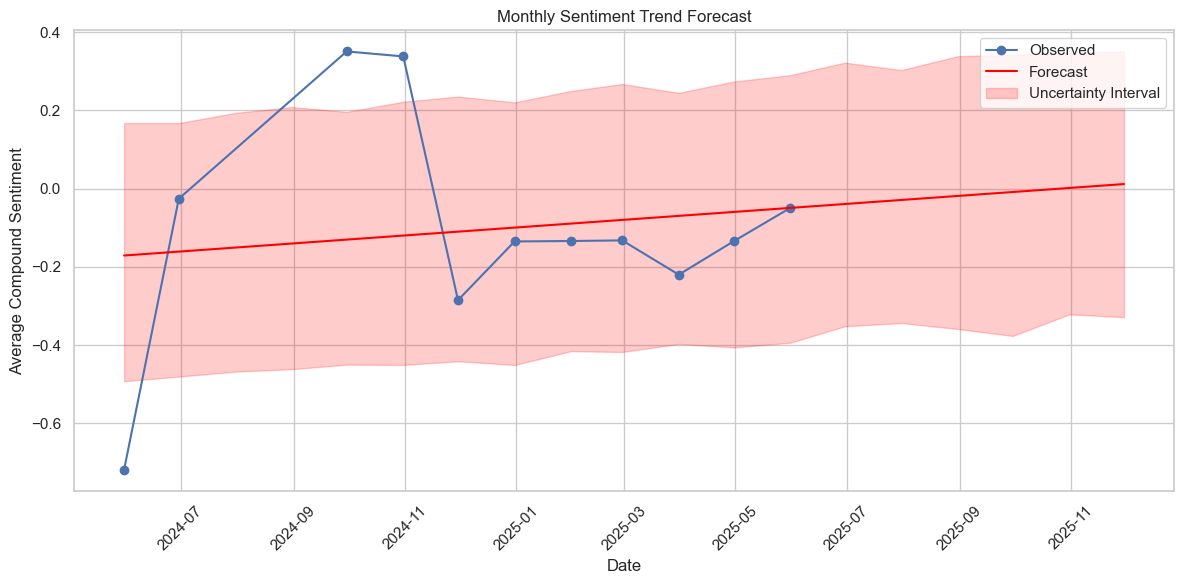

In [48]:
# If the "Observed" graph is missing in your forecast plot, it's likely because ts_df['y'] contains NaN values for some dates.
# Matplotlib will not plot lines where y is NaN, resulting in gaps or missing lines.

# Let's check for missing values in the observed data:
print(ts_df)

# To plot only the observed (non-NaN) values:
observed = ts_df.dropna(subset=['y'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(observed['ds'], observed['y'], label='Observed', marker='o')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Uncertainty Interval')

ax.set_title('Monthly Sentiment Trend Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Average Compound Sentiment')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
monthly_trend_df

,published_date,compound,month_num
0,2024-05,-0.718400,652
1,2024-06,-0.025733,653
2,2024-09,0.350550,656
3,2024-10,0.337800,657
4,2024-11,-0.284986,658
5,2024-12,-0.134950,659
6,2025-01,-0.133792,660
7,2025-02,-0.132276,661
8,2025-03,-0.219814,662
9,2025-04,-0.134674,663


MSE: 0.0036249979808448784
R2: -0.0005535189401917329


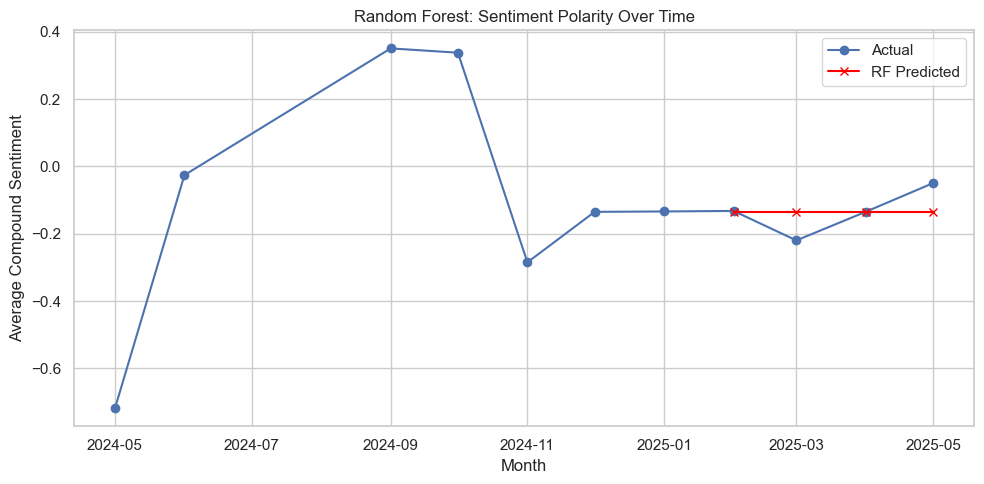

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features: use time as ordinal (e.g., month number) for prediction
# We'll use the monthly_trend index (datetime) as X, and the polarity as y
monthly_trend_df = monthly_trend.reset_index()
monthly_trend_df['month_num'] = monthly_trend_df['published_date'].apply(lambda x: x.ordinal)
X = monthly_trend_df[['month_num']]
y = monthly_trend_df['compound']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
# Convert Period to Timestamp for plotting
plot_dates = monthly_trend_df['published_date'].dt.to_timestamp()
plt.plot(plot_dates, y, label='Actual', marker='o')
plt.plot(plot_dates.iloc[X_test.index], y_pred, label='RF Predicted', marker='x', color='red')
plt.title('Random Forest: Sentiment Polarity Over Time')
plt.xlabel('Month')
plt.ylabel('Average Compound Sentiment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

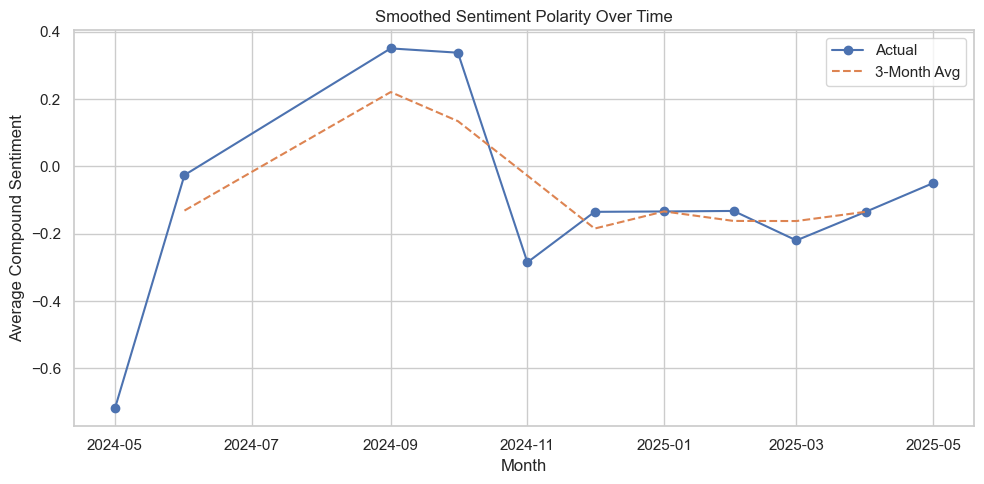

In [58]:
monthly_trend_df['rolling_mean'] = monthly_trend_df['compound'].rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 5))
plot_dates = monthly_trend_df['published_date'].dt.to_timestamp()
plt.plot(plot_dates, monthly_trend_df['compound'], label='Actual', marker='o')
plt.plot(plot_dates, monthly_trend_df['rolling_mean'], label='3-Month Avg', linestyle='--')
plt.title('Smoothed Sentiment Polarity Over Time')
plt.xlabel('Month')
plt.ylabel('Average Compound Sentiment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Make sure published_date is in datetime format ---
df['published_date'] = pd.to_datetime(df['published_date'])

# --- Time Features ---
df['month_num'] = df['published_date'].apply(lambda x: x.toordinal())
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['weekday'] = df['published_date'].dt.weekday

# --- Text Features ---
df['text_length'] = df['clean_text'].str.len()
df['token_count'] = df['tokens'].apply(len)

# --- Keyword Columns ---
keyword_cols = ['china', 'steel', 'semiconductor', 'electronic', 'semiconductors', 'electronics']

# --- Handle 'source' (Categorical Feature) ---
top_sources = df['source'].value_counts().nlargest(10).index
df['source'] = df['source'].apply(lambda x: x if x in top_sources else 'Other')
df = pd.get_dummies(df, columns=['source'], drop_first=True)

# --- Final Feature Set ---
feature_cols = ['month_num', 'year', 'month', 'weekday', 'text_length', 'token_count'] + keyword_cols
feature_cols += [col for col in df.columns if col.startswith('source_')]

X = df[feature_cols]
y = df['compound']


KeyError: 'source'